# 2. Linear Regression

Back to basics. We'll do the closed form solution, then use the backpropagation implementations from before to achieve the same solution with gradient descent. After that, we'll demonstrate the importance of nonlinearity.

## 2.1 Closed-Form Solution

Using this [very helpful explanation](https://github.com/ryankresse/normal_equation_intuition/blob/master/normal_equation.ipynb) as a reference.

Okay, so linear regression attempts to find a set of weights and a bias that minimizes the error between the outputs and the true values. Because our desired result model is linear, the problem space is quite simple, so we are actually able to solve this without gradient descent: i.e. there is a closed-form mathematical solution to linear regression that is guaranteed to find the global minimum.

That solution is possible because of the geometry of the problem, which can be visualized in the link above. I won't go into too much detail because it's already been very well explained there, but to summarize:

1. We have an input vector $X$ and an output vector $Y$, for which we want to find $W$ such that $XW$ is as close to $Y$ as possible.
2. The entries of vector $X$ can be used to create a column space, which you can think of as a plane containing all possible linear combinations of the features of $X$ (which in this case is just a single column for the $x$ variable and a column of ones for the $y$-intercept).
3. If $Y$ is in the column space, the error is just the zero vector. Otherwise, for any possible $Y$ vector in space, the "minimum error" is achieved by taking the shortest distance from its terminal point to the column space, which is always orthogonal to the column space.
4. Using the knowledge above, we can write out a property of the problem space, which is that the dot product of $X$ and the minimum error vector, given by $Y - XW$, is 0.
$$X^T(Y-XW) = 0$$
5. And after some tinkering around, we arrive at our closed-form solution.
$$W = (X^TX)^{-1}X^TY$$

Again, you can visit that link above for a more in-depth walkthrough of the steps above. But this is the gist of it.

With this, we can go ahead and test it out!

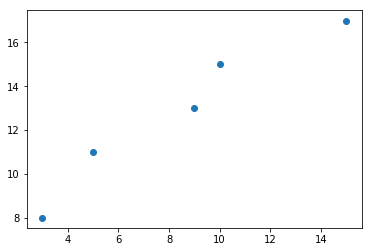

In [37]:
import numpy as np
from matplotlib import pyplot as plt

X = np.array([3, 5, 9, 10, 15])
Y = np.array([8, 11, 13, 15, 17])

plt.scatter(X, Y)
plt.show()

We can create the input vector by adding a column of ones to X. Then it's just as simple as applying the solution equation:

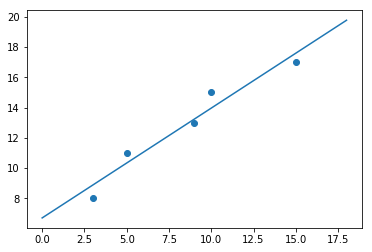

In [39]:
X_plus1 = np.concatenate([X.reshape(5, 1), np.ones([5, 1])], axis=1)
W = np.linalg.inv(X_plus1.T @ X_plus1) @ X_plus1.T @ Y

x = np.linspace(0, 18, 100)
y = W[0]*x + W[1]

plt.scatter(X, Y)
plt.plot(x, y)
plt.show()

In [36]:
W

array([ 0.72706422,  6.69266055])